<a href="https://colab.research.google.com/github/tuananh1006/Probability/blob/main/ClassifyOneClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X=mnist["data"]
y=mnist['target']

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

(-0.5, 27.5, 27.5, -0.5)

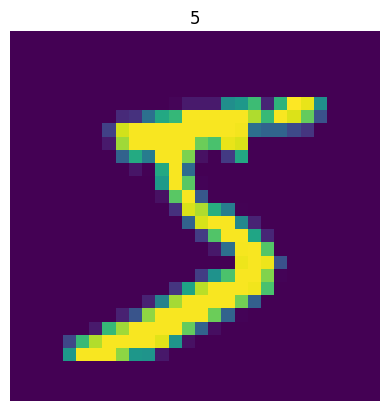

In [ ]:
#show image
from matplotlib import pyplot as plt
import numpy as np
some_digit=np.array(X.loc[0,:])
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.title(y[0])
plt.axis("off")

In [ ]:
y=y.astype(np.uint8)


In [ ]:
y_8=(y==8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_8,test_size=0.2,random_state=42,stratify=y_8)

In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({False: 50540, True: 5460})
Counter({False: 12635, True: 1365})


In [ ]:
#Logistic
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97     12635
        True       0.77      0.67      0.72      1365

    accuracy                           0.95     14000
   macro avg       0.87      0.83      0.84     14000
weighted avg       0.95      0.95      0.95     14000



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=3,scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.94637596, 0.94685809, 0.94696239])

In [ ]:
from sklearn.base import BaseEstimator
class Never8Classifier(BaseEstimator):
  def __init__(self):
    pass
  def fit(self,X,y=None):
    pass
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)

In [ ]:
modelfake=Never8Classifier()
cross_val_score(modelfake,X_train,y_train,cv=3,scoring="accuracy")

array([0.90416243, 0.90378743, 0.89954998])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[12357,   278],
       [  445,   920]])

In [ ]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.7679465776293823
0.673992673992674


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7179087007413187

In [ ]:
from sklearn.metrics import precision_score,recall_score
thresholds=np.arange(-5,5,0.01)
precision_scores=[]
recall_scores=[]
for threshold in thresholds:
  y_pred_threshold=(model.decision_function(X_test)>threshold)
  precision_scores.append(precision_score(y_test,y_pred_threshold))
  recall_scores.append(recall_score(y_test,y_pred_threshold))

In [ ]:
list_candidate_index=np.where(np.abs((np.array(precision_scores)-np.array(recall_scores)))<0.01)[0]

In [ ]:
list_candidate_index

array([463, 464, 465, 466, 467, 468, 469])

In [ ]:
different=[np.abs((np.array(precision_scores[index])-np.array(recall_scores[index]))) for index in list_candidate_index]


In [ ]:
min_index=np.argmin(different)

In [ ]:
min_index

4

In [ ]:
best_threshold=thresholds[list_candidate_index[min_index]]

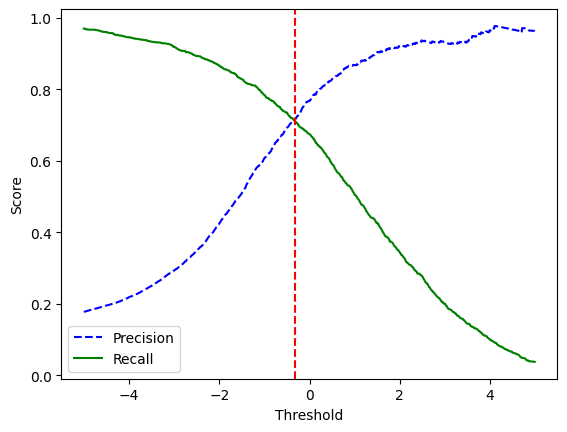

In [ ]:
plt.plot(thresholds,precision_scores,"b--",label="Precision")
plt.plot(thresholds,recall_scores,"g-",label="Recall")
plt.axvline(best_threshold,color="r",ls='--')
plt.ylabel("Score")
plt.xlabel("Threshold")
plt.legend()

Text(0.5, 0, 'Threshold')

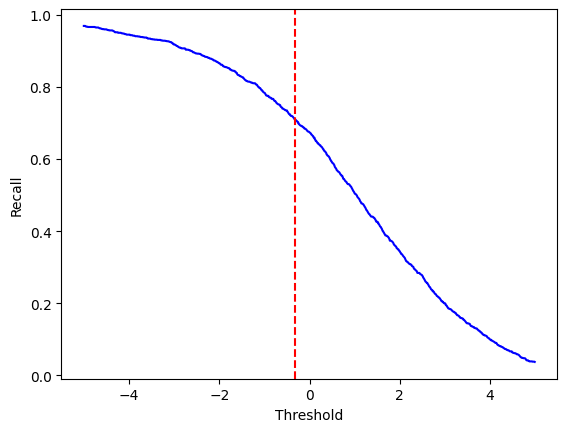

In [ ]:
plt.plot(thresholds,recall_scores,color='blue')
plt.axvline(best_threshold,color='r',ls='--')
plt.ylabel("Recall")
plt.xlabel("Threshold")

In [ ]:
y_pred=(model.decision_function(X_test)>best_threshold)

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

Text(0, 0.5, 'True Positive Rate')

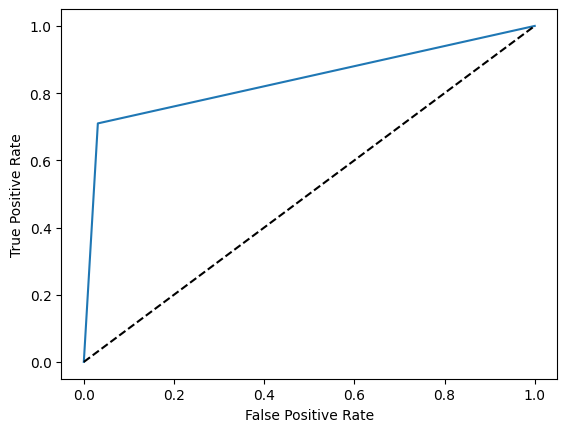

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8393930169553439

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
prob_predict=cross_val_predict(model,X_train,y_train,cv=3,method="predict_proba")

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train,prob_predict[:,1])

Text(0, 0.5, 'True Positive Rate')

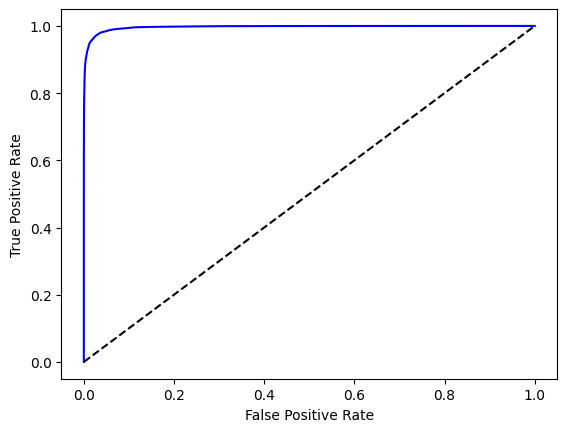

In [ ]:
plt.plot(fpr,tpr,color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,prob_predict[:,1])

0.9965455135815247